In [1]:
%matplotlib notebook 
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from scipy import integrate
import glob,sys

from mpl_toolkits.basemap import Basemap, shiftgrid

import MV2 as MV
import cdms2 as cdms
import genutil
import cdutil
import cdtime

sys.path.append("/Users/kmarvel/Google Drive/python-utils")
import Plotting


def bmap(X,projection="moll",**kwargs):
    """ quick plot of data on a lat,lon grid """
   # lon = X.getLongitude()[:]
    #lat = X.getLatitude()[:]
    
    lon = X.getLongitude().getBounds()[:,0]
    lat = X.getLatitude().getBounds()[:,0]
    vmin=None
    vmax=None
    if "vmin" in kwargs.keys():
        vmin=kwargs.pop("vmin")
    if "vmax" in kwargs.keys():
        vmax=kwargs.pop("vmax")
    if not ("lon_0" in list(kwargs.keys())):
        lon_0=np.median(lon)
    else:
        lon_0=kwargs.pop("lon_0")
        X,lon = shiftgrid(180,X,lon,start=False)
    m = Basemap(lon_0=lon_0,projection=projection,**kwargs)
    
        
    x,y=m(*np.meshgrid(lon,lat))
    #if vmin is None:
    #m.pcolormesh(x,y,X,**kwargs)
    #else:
    m.pcolor(x,y,X,vmin=vmin,vmax=vmax)
    return m

surface = {"hfls": "Surface Upward Latent Heat Flux",\
            "hfss": "Surface Upward Sensible Heat Flux",\
            "rlds":"Surface Downwelling Longwave Radiation",\
            "rlus":"Surface Upwelling Longwave Radiation",\
            "rsds":"Surface Downwelling Shortwave Radiation",\
            "rsus": "Surface Upwelling Shortwave Radiation"}
TOA = {"rsdt":"TOA Incident Shortwave Radiation",\
       "rsut": "TOA Outgoing Shortwave Radiation",\
       "rlut": "TOA Outgoing Longwave Radiation"}

In [2]:

rootstem="/Volumes/SahelData/LGM/"
datadirec="/Volumes/SahelData/LGM/dansgaard/"

#rootstem="/Users/kmarvel/Documents/DATA/LGM/"
#datadirec="/Users/kmarvel/Documents/DATA/dansgaard/RUNS/"

piCfile=datadirec+'ANN1950-1979.aijW3anl_00PI.nc'
LGMfile= datadirec+'ANN1950-1979.aijW3rfanl_21kl.nc'
FullLGMfile= datadirec+'ANN1950-1969.aijW3anl_21kl.nc'
noGHGfile=datadirec+"ANN1950-1969.aijW3rfanl_21kl_noghg.nc"
#cpdirec="/Volumes/SahelData/LGM/dansgaard/"


In [3]:
fLGM=cdms.open(LGMfile)
TOA_LGM=fLGM("net_rad_planet")
tsurf_LGM=fLGM("tsurf")

/Users/kmarvel/anaconda2/envs/cdatpy3/lib/python3.6/site-packages/cdms2/axis.py:1685: UserWarning: 
Your first bounds[0,0] -180.000000000000000 will be corrected to -180.000000000000000
Your bounds bounds[-1,1] 180.000000000000000 will be corrected to 180.000000000000000
  warnings.warn(msg, UserWarning)


In [4]:
# fnoGHG=cdms.open(noGHGfile)
# TOA_noGHG=fnoGHG("net_rad_planet")
# tsurf_noGHG=fnoGHG("tsurf")

In [5]:
fpiC=cdms.open(piCfile)
TOA_piC=fpiC("net_rad_planet")
tsurf_piC=fpiC("tsurf")
delta_TOA=TOA_LGM-TOA_piC
delta_tsurf=tsurf_LGM-tsurf_piC

# delta_TOA_noGHG=TOA_noGHG-TOA_piC
# delta_tsurf_noGHG=tsurf_noGHG-tsurf_piC

In [6]:
#Full LGM temperature
ffull=cdms.open(FullLGMfile)
TOA_fullLGM=ffull("net_rad_planet")
tsurf_fullLGM=ffull("tsurf")
delta_tsurf_full=cdutil.averager(tsurf_fullLGM-tsurf_piC,axis='xy')

/Users/kmarvel/anaconda2/envs/cdatpy3/lib/python3.6/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


In [7]:
#Why is there such a large imbalance in the full LGM run?
cdutil.averager(TOA_fullLGM,axis='xy')

variable_57
masked_array(data=0.96452135,
             mask=False,
       fill_value=1e+20)

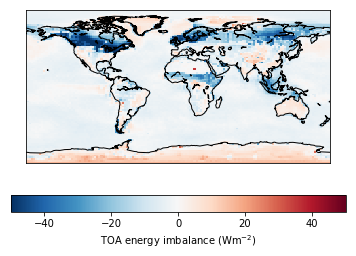

In [8]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(delta_TOA,vmin=-50,vmax=50,projection="cyl")
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"TOA energy imbalance (Wm$^{-2})$")
#plt.savefig("ForGavin/TOA.png")

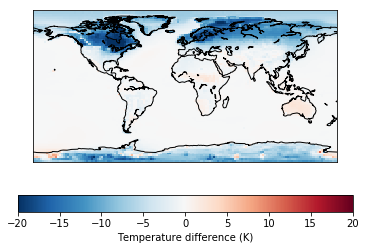

In [9]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(tsurf_LGM-tsurf_piC,projection="cyl",vmin=-20,vmax=20)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"Temperature difference (K)")
#plt.savefig("ForGavin/Tsurf.png")

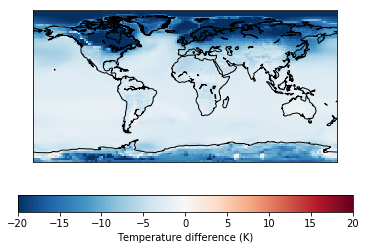

In [10]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(tsurf_fullLGM-tsurf_piC,projection="cyl",vmin=-20,vmax=20)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"Temperature difference (K)")
#plt.savefig("ForGavin/Tsurf_full.png")

In [11]:
print("Full LGM temperature difference is",cdutil.averager(tsurf_fullLGM-tsurf_piC,axis='xy'))
print("fixed-SST cooling is ",cdutil.averager(delta_tsurf,axis='xy'))


Full LGM temperature difference is -4.978419993074337
fixed-SST cooling is  -1.408040116964039


# Climate sensitivity
Using the q flux values (section 5, https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2013MS000265)

In [12]:
def deltafixedSST(variable,full=False,remove_global_mean=False):
    if full:
        LGMvar=ffull(variable)
    else:
        LGMvar=fLGM(variable)
        
    piCvar=fpiC(variable)
    if remove_global_mean:
        LGMvar=LGMvar-cdutil.averager(LGMvar,axis='xy')
        piCvar=piCvar-cdutil.averager(piCvar,axis='xy')
    return LGMvar-piCvar
def plot_delta(variable,full=False,vmin=None,vmax=None,remove_global_mean=False,mask_land_ice=False):
    plt.figure()
    to_plot=deltafixedSST(variable,full=full,remove_global_mean=remove_global_mean)
    if mask_land_ice:
        landicechange=deltafixedSST("landicefr")
        to_plot=MV.masked_where(landicechange>99,to_plot)
    m=bmap(to_plot,projection="cyl",vmin=vmin,vmax=vmax)
    m.drawcoastlines()
    plt.colorbar(orientation="horizontal")

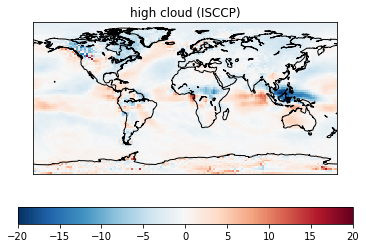

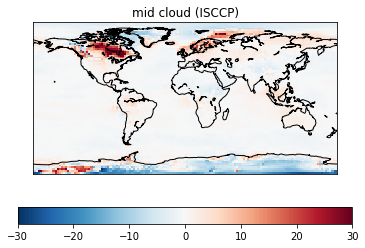

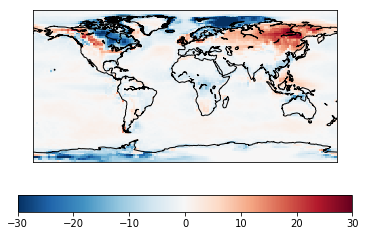

In [13]:
plot_delta("pcldh_isccp",vmin=-20,vmax=20)
plt.title("high cloud (ISCCP)")
plot_delta("pcldm_isccp",vmin=-30,vmax=30)
plt.title("mid cloud (ISCCP)")
plot_delta("pcldl_isccp",vmin=-30,vmax=30)

/Users/kmarvel/anaconda2/envs/cdatpy3/lib/python3.6/site-packages/numpy/ma/core.py:3206: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


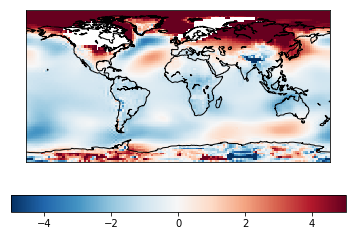

In [14]:
plot_delta("slp",full=True,remove_global_mean=True,vmin=-5,vmax=5,mask_land_ice=True)

In [15]:
#0.5 toa
def get_abrupt(variable,model="GISS-E2-1-G",factor="0p5"):
    #abrupt0p5direc="/Users/kmarvel/Documents/DATA/LGM/abrupt-0p5xCO2/"+model+"/"
    abrupt0p5direc=rootstem+"abrupt-"+factor+"xCO2/"+model+"/"
    vfiles=sorted(glob.glob(abrupt0p5direc+"*"+variable+"*"))
    fv=cdms.open(vfiles[0])
    data=cdutil.averager(fv(variable),axis='xy')
    fv.close()
    if len(vfiles)>1:
        for fil in vfiles[1:]:
            fv=cdms.open(fil)
            mdata=cdutil.averager(fv(variable),axis='xy')
            data=MV.concatenate((data,mdata))
            fv.close()

    cdutil.setTimeBoundsMonthly(data)
    return data

rsdt0p5=get_abrupt("rsdt")
rsut0p5=get_abrupt("rsut")
rlut0p5=get_abrupt("rlut")
TOA0p5=rsdt0p5-(rsut0p5+rlut0p5)
T0p5=get_abrupt("tas")

In [16]:
#0.5 toa
def get_cmip6_piControl(variable,model="GISS-E2-1-G"):
    #abrupt0p5direc="/Users/kmarvel/Documents/DATA/LGM/abrupt-0p5xCO2/"+model+"/"
    piCdirec=rootstem+"piControl/"+model+"/"
    vfiles=sorted(glob.glob(piCdirec+"*"+variable+"*"))
    fv=cdms.open(vfiles[0])
    data=cdutil.averager(fv(variable),axis='xy')
    fv.close()
    if len(vfiles)>1:
        for fil in vfiles[1:]:
            fv=cdms.open(fil)
            mdata=cdutil.averager(fv(variable),axis='xy')
            data=MV.concatenate((data,mdata))
            fv.close()

    cdutil.setTimeBoundsMonthly(data)
    return data
rsdtpiC=get_cmip6_piControl("rsdt")
rsutpiC=get_cmip6_piControl("rsut")
rlutpiC=get_cmip6_piControl("rlut")
TOApiC=rsdtpiC-(rsutpiC+rlutpiC)
TpiC=get_cmip6_piControl("tas")


In [17]:
cdutil.averager(TOA_piC,axis='xy')

variable_642
masked_array(data=-0.10572674,
             mask=False,
       fill_value=1e+20)

In [18]:
rsdt4=get_abrupt("rsdt",factor="4")
rsut4=get_abrupt("rsut",factor="4")
rlut4=get_abrupt("rlut",factor="4")
TOA4=rsdt4-(rsut4+rlut4)
T04=get_abrupt("tas",factor="4")

In [19]:
rsdt2=get_abrupt("rsdt",factor="2")
rsut2=get_abrupt("rsut",factor="2")
rlut2=get_abrupt("rlut",factor="2")
TOA2=rsdt2-(rsut2+rlut2)
T02=get_abrupt("tas",factor="2")

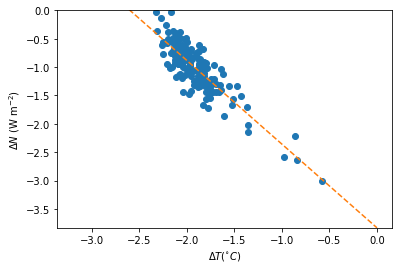

In [20]:
y=cdutil.YEAR(TOA0p5)-MV.average(TOApiC)
x=cdutil.YEAR(T0p5)-MV.average(TpiC)


plt.figure()
plt.plot(x.asma(),y.asma(),"o")
p=np.polyfit(x,y,1)
xn=np.arange(-3.2,0.1,.1)
plt.plot(xn,np.polyval(p,xn),ls="--")
xlab=plt.xlabel(r'$\Delta T (^{\circ}C)$')
ylab=plt.ylabel(r'$\Delta N$ (W m$^{-2})$')
np.polyval(p,0.)
#plt.xlim(-3.2,0)
plt.ylim(p[1],0)
plt.savefig("/Users/kmarvel/Desktop/A0p5CO2.png")
lam,Fcing=p
ECS0p5=Fcing/-lam

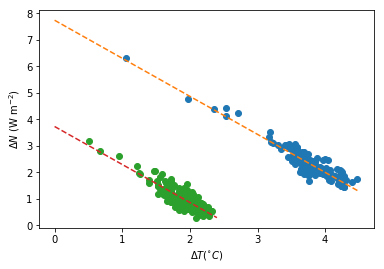

In [21]:
TOA4=rsdt4-(rsut4+rlut4)
y4=cdutil.YEAR(TOA4)-MV.average(TOApiC)
x4=cdutil.YEAR(T04)-MV.average(TpiC)


plt.figure()
plt.plot(x4.asma(),y4.asma(),"o")
p4=np.polyfit(x4,y4,1)
xn=np.arange(0,np.max(x4)+.1,.1)
plt.plot(xn,np.polyval(p4,xn),ls="--")
xlab=plt.xlabel(r'$\Delta T (^{\circ}C)$')
ylab=plt.ylabel(r'$\Delta N$ (W m$^{-2})$')


lam4,Fcing4=p4
ECS4=Fcing4/-lam4

y2=cdutil.YEAR(TOA2)-MV.average(TOApiC)
x2=cdutil.YEAR(T02)-MV.average(TpiC)


plt.plot(x2.asma(),y2.asma(),"o")
p2=np.polyfit(x2,y2,1)
xn=np.arange(0,np.max(x2)+.1,.1)
plt.plot(xn,np.polyval(p2,xn),ls="--")
xlab=plt.xlabel(r'$\Delta T (^{\circ}C)$')
ylab=plt.ylabel(r'$\Delta N$ (W m$^{-2})$')


lam2,Fcing2=p2
ECS2=Fcing2/-lam2

In [22]:
print("4xCO2 ECS ",ECS4/2.)
print("4xCO2 inferred 2xCO2 forcing",Fcing4/2)
print("2xCO2 ECS ",ECS2)
print("2xCO2 inferred 2xCO2 forcing",Fcing2)
print("0.5xCO2 ECS ",ECS0p5)
print("0xCO2 inferred 2xCO2 forcing",Fcing)

4xCO2 ECS  2.6970053260544655
4xCO2 inferred 2xCO2 forcing 3.8694026767293956
2xCO2 ECS  2.604344893932294
2xCO2 inferred 2xCO2 forcing 3.7310037492819683
0.5xCO2 ECS  -2.5969930961351486
0xCO2 inferred 2xCO2 forcing -3.8313186257979965


In [23]:
ECS=ECS4/2.
F2x=Fcing4/2.
lam=F2x/ECS
lam

GISS_ERF=cdutil.averager(delta_TOA,axis='xy')+float(cdutil.averager(delta_tsurf,axis='xy'))*lam
print("ERF OF THE GISS MODEL IS",GISS_ERF)



ERF OF THE GISS MODEL IS -6.7314269425521704


alpha is -0.0035369711336332853


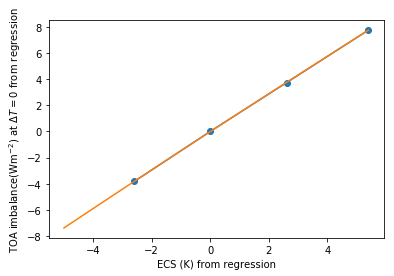

In [24]:

parax=[ECS0p5,0,ECS2,ECS4]
paray=[Fcing,0,Fcing2,Fcing4]
plt.figure()
plt.plot(parax,paray,"o-")
pstate=np.polyfit(parax,paray,2)
xn=np.arange(-5,5.5,.1)
plt.plot(xn,np.polyval(pstate,xn))
print("alpha is",pstate[0])
plt.xlabel("ECS (K) from regression")
plt.ylabel(r"TOA imbalance(Wm$^{-2}$) at $\Delta T=0$ from regression")
plt.savefig("/Users/kmarvel/Desktop/GISS_state_dependence.png")

LGM CO2 forcing is -2.151510593544926


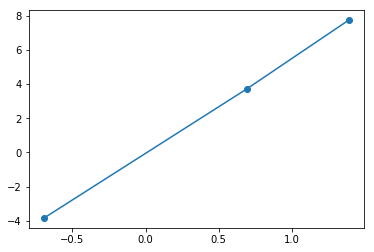

In [25]:
co2conc=np.log(np.array([.5,2.,4.]))
Fco2=[Fcing,Fcing2,Fcing4]
plt.figure()
plt.plot(co2conc,Fco2,"o-")
pco2=np.polyfit(co2conc,Fco2,1)
Cco2=pco2[0]
FCO2_LGM=Cco2*np.log(190./280.)
print("LGM CO2 forcing is",FCO2_LGM)
FGHG_LGM=FCO2_LGM+(-.4+-.3)

In [26]:
Fother=GISS_ERF-FCO2_LGM

In [27]:
(lam*delta_tsurf_full-FCO2_LGM)/Fother

variable_14961
masked_array(data=1.08976782,
             mask=False,
       fill_value=1e+20)

In [28]:
Cco2

5.54848335267918

In [34]:
for key in fLGM.variables.keys():
    print(key,fLGM.variables[key].attributes)

axyp {'missing_value': 1e+20, 'units': 'm^2', 'long_name': 'gridcell area'}
ocnfr {'missing_value': 1e+20, 'units': '%', 'long_name': 'OCEAN FRACTION'}
ocnfr_hemis {'missing_value': 1e+20}
oicefr {'missing_value': 1e+20, 'units': '%', 'long_name': 'OCEAN/LAKE ICE COVERAGE'}
oicefr_hemis {'missing_value': 1e+20}
opocnfr {'missing_value': 1e+20, 'units': '%', 'long_name': 'OPEN OCEAN FRACTION'}
opocnfr_hemis {'missing_value': 1e+20}
lakefr {'missing_value': 1e+20, 'units': '%', 'long_name': 'LAKE FRACTION'}
lakefr_hemis {'missing_value': 1e+20}
opwatfr {'missing_value': 1e+20, 'units': '%', 'long_name': 'OPEN WATER FRACTION'}
opwatfr_hemis {'missing_value': 1e+20}
pwatfr {'missing_value': 1e+20, 'units': '%', 'long_name': 'WATER FRACTION'}
pwatfr_hemis {'missing_value': 1e+20}
soilfr {'missing_value': 1e+20, 'units': '%', 'long_name': 'SOIL FRACTION'}
soilfr_hemis {'missing_value': 1e+20}
bsfr {'missing_value': 1e+20, 'units': '%', 'long_name': 'BARE SOIL FRACTION'}
bsfr_hemis {'missing_

swaerrf_toa_net_hemis {'missing_value': 1e+20}
lwaerrf_toa_net {'missing_value': 1e+20, 'units': 'W/m^2', 'long_name': 'LW AER RADIATIVE FORCING, TOA NET'}
lwaerrf_toa_net_hemis {'missing_value': 1e+20}
swaerrf_surf_net {'missing_value': 1e+20, 'units': 'W/m^2', 'long_name': 'SW AER RADIATIVE FORCING, SURF NET'}
swaerrf_surf_net_hemis {'missing_value': 1e+20}
lwaerrf_surf_net {'missing_value': 1e+20, 'units': 'W/m^2', 'long_name': 'LW AER RADIATIVE FORCING, SURF NET'}
lwaerrf_surf_net_hemis {'missing_value': 1e+20}
swaeraa_toa_net {'missing_value': 1e+20, 'units': 'W/m^2', 'long_name': 'SW AER ATMOS. ABSORPTION NET'}
swaeraa_toa_net_hemis {'missing_value': 1e+20}
lwaeraa_toa_net {'missing_value': 1e+20, 'units': 'W/m^2', 'long_name': 'LW AER ATMOS. ABSORPTION NET'}
lwaeraa_toa_net_hemis {'missing_value': 1e+20}
swdcls {'missing_value': 1e+20, 'units': 'W/m^2', 'long_name': 'SW CLR-SKY DOWNWARD RADIATION, SURFACE METHOD 2'}
swdcls_hemis {'missing_value': 1e+20}
swncls {'missing_value': 

In [59]:
plot_delta("omega_1000",vmin=-.1,vmax-.1,mask_land_ice=True)

SyntaxError: positional argument follows keyword argument (<ipython-input-59-eba17b547ad2>, line 1)

In [40]:
cdutil.averager(deltafixedSST("pcldh"),axis='xy')

variable_15040
masked_array(data=-0.49989811,
             mask=False,
       fill_value=1e+20)